## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

Text(0.5, 1.0, 'Image label: 7')

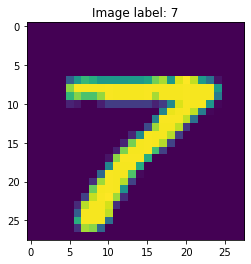

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(784, 784 // 4)
        self.lin2 = nn.Linear(784 // 4, 784 // 8)
        self.lin3 = nn.Linear(784 // 8, 10)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = self.lin3(x)
        return F.log_softmax(x, dim=1)

In [4]:
# Creating model instance
model = Net() # your code here

Локальные тесты для проверки вашей модели доступны ниже:

In [5]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = nn.CrossEntropyLoss()
EPOCHS = 20
model.train()
for epoch in range(EPOCHS):
    correct = 0
    for batch_idx, (X_batch, y_batch) in enumerate(train_data_loader):
        X_batch = X_batch.reshape(-1, 784)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = error(output, y_batch)
        loss.backward()
        optimizer.step()
        # Total correct predictions
        predicted = torch.max(output.data, 1)[1] 
        correct += (predicted == y_batch).sum()
        if batch_idx % 50 == 0:
            print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                epoch, batch_idx*len(X_batch), len(train_data_loader.dataset), 100.*batch_idx / len(train_data_loader), loss, float(correct*100) / float(32*(batch_idx+1))))


Epoch : 0 [0/60000 (0%)]	Loss: 0.000013	 Accuracy:100.000%
Epoch : 0 [1600/60000 (3%)]	Loss: 0.000271	 Accuracy:100.000%
Epoch : 0 [3200/60000 (5%)]	Loss: 0.000011	 Accuracy:99.907%
Epoch : 0 [4800/60000 (8%)]	Loss: 0.000249	 Accuracy:99.917%
Epoch : 0 [6400/60000 (11%)]	Loss: 0.007681	 Accuracy:99.860%
Epoch : 0 [8000/60000 (13%)]	Loss: 0.000096	 Accuracy:99.801%
Epoch : 0 [9600/60000 (16%)]	Loss: 0.000003	 Accuracy:99.751%
Epoch : 0 [11200/60000 (19%)]	Loss: 0.000001	 Accuracy:99.697%
Epoch : 0 [12800/60000 (21%)]	Loss: 0.001916	 Accuracy:99.688%
Epoch : 0 [14400/60000 (24%)]	Loss: 0.000005	 Accuracy:99.654%
Epoch : 0 [16000/60000 (27%)]	Loss: 0.005453	 Accuracy:99.657%
Epoch : 0 [17600/60000 (29%)]	Loss: 0.003229	 Accuracy:99.643%
Epoch : 0 [19200/60000 (32%)]	Loss: 0.000014	 Accuracy:99.646%
Epoch : 0 [20800/60000 (35%)]	Loss: 0.047318	 Accuracy:99.630%
Epoch : 0 [22400/60000 (37%)]	Loss: 0.001600	 Accuracy:99.608%
Epoch : 0 [24000/60000 (40%)]	Loss: 0.008675	 Accuracy:99.621%
Epoc

Epoch : 3 [32000/60000 (53%)]	Loss: 0.000032	 Accuracy:99.728%
Epoch : 3 [33600/60000 (56%)]	Loss: 0.013975	 Accuracy:99.732%
Epoch : 3 [35200/60000 (59%)]	Loss: 0.000046	 Accuracy:99.739%
Epoch : 3 [36800/60000 (61%)]	Loss: 0.000077	 Accuracy:99.748%
Epoch : 3 [38400/60000 (64%)]	Loss: 0.001008	 Accuracy:99.745%
Epoch : 3 [40000/60000 (67%)]	Loss: 0.000849	 Accuracy:99.753%
Epoch : 3 [41600/60000 (69%)]	Loss: 0.000496	 Accuracy:99.755%
Epoch : 3 [43200/60000 (72%)]	Loss: 0.001020	 Accuracy:99.757%
Epoch : 3 [44800/60000 (75%)]	Loss: 0.000580	 Accuracy:99.743%
Epoch : 3 [46400/60000 (77%)]	Loss: 0.000038	 Accuracy:99.737%
Epoch : 3 [48000/60000 (80%)]	Loss: 0.003388	 Accuracy:99.734%
Epoch : 3 [49600/60000 (83%)]	Loss: 0.013992	 Accuracy:99.726%
Epoch : 3 [51200/60000 (85%)]	Loss: 0.000516	 Accuracy:99.719%
Epoch : 3 [52800/60000 (88%)]	Loss: 0.000027	 Accuracy:99.712%
Epoch : 3 [54400/60000 (91%)]	Loss: 0.001173	 Accuracy:99.719%
Epoch : 3 [56000/60000 (93%)]	Loss: 0.000239	 Accuracy:

Epoch : 7 [0/60000 (0%)]	Loss: 0.031847	 Accuracy:96.875%
Epoch : 7 [1600/60000 (3%)]	Loss: 0.073183	 Accuracy:99.694%
Epoch : 7 [3200/60000 (5%)]	Loss: 0.000034	 Accuracy:99.752%
Epoch : 7 [4800/60000 (8%)]	Loss: 0.001433	 Accuracy:99.814%
Epoch : 7 [6400/60000 (11%)]	Loss: 0.012357	 Accuracy:99.720%
Epoch : 7 [8000/60000 (13%)]	Loss: 0.001044	 Accuracy:99.726%
Epoch : 7 [9600/60000 (16%)]	Loss: 0.015708	 Accuracy:99.740%
Epoch : 7 [11200/60000 (19%)]	Loss: 0.000001	 Accuracy:99.733%
Epoch : 7 [12800/60000 (21%)]	Loss: 0.000011	 Accuracy:99.704%
Epoch : 7 [14400/60000 (24%)]	Loss: 0.003274	 Accuracy:99.681%
Epoch : 7 [16000/60000 (27%)]	Loss: 0.000002	 Accuracy:99.701%
Epoch : 7 [17600/60000 (29%)]	Loss: 0.000000	 Accuracy:99.699%
Epoch : 7 [19200/60000 (32%)]	Loss: 0.000053	 Accuracy:99.693%
Epoch : 7 [20800/60000 (35%)]	Loss: 0.000237	 Accuracy:99.678%
Epoch : 7 [22400/60000 (37%)]	Loss: 0.000011	 Accuracy:99.661%
Epoch : 7 [24000/60000 (40%)]	Loss: 0.000043	 Accuracy:99.663%
Epoch 

Epoch : 10 [32000/60000 (53%)]	Loss: 0.000001	 Accuracy:99.806%
Epoch : 10 [33600/60000 (56%)]	Loss: 0.000001	 Accuracy:99.801%
Epoch : 10 [35200/60000 (59%)]	Loss: 0.000124	 Accuracy:99.807%
Epoch : 10 [36800/60000 (61%)]	Loss: 0.000005	 Accuracy:99.810%
Epoch : 10 [38400/60000 (64%)]	Loss: 0.000000	 Accuracy:99.810%
Epoch : 10 [40000/60000 (67%)]	Loss: 0.000281	 Accuracy:99.805%
Epoch : 10 [41600/60000 (69%)]	Loss: 0.000008	 Accuracy:99.805%
Epoch : 10 [43200/60000 (72%)]	Loss: 0.000166	 Accuracy:99.813%
Epoch : 10 [44800/60000 (75%)]	Loss: 0.011469	 Accuracy:99.815%
Epoch : 10 [46400/60000 (77%)]	Loss: 0.001024	 Accuracy:99.819%
Epoch : 10 [48000/60000 (80%)]	Loss: 0.004924	 Accuracy:99.821%
Epoch : 10 [49600/60000 (83%)]	Loss: 0.000001	 Accuracy:99.819%
Epoch : 10 [51200/60000 (85%)]	Loss: 0.000045	 Accuracy:99.813%
Epoch : 10 [52800/60000 (88%)]	Loss: 0.000085	 Accuracy:99.813%
Epoch : 10 [54400/60000 (91%)]	Loss: 0.000132	 Accuracy:99.816%
Epoch : 10 [56000/60000 (93%)]	Loss: 0.0

Epoch : 13 [57600/60000 (96%)]	Loss: 0.000000	 Accuracy:99.787%
Epoch : 13 [59200/60000 (99%)]	Loss: 0.000009	 Accuracy:99.792%
Epoch : 14 [0/60000 (0%)]	Loss: 0.000001	 Accuracy:100.000%
Epoch : 14 [1600/60000 (3%)]	Loss: 0.000008	 Accuracy:100.000%
Epoch : 14 [3200/60000 (5%)]	Loss: 0.000104	 Accuracy:99.969%
Epoch : 14 [4800/60000 (8%)]	Loss: 0.000385	 Accuracy:99.938%
Epoch : 14 [6400/60000 (11%)]	Loss: 0.000008	 Accuracy:99.922%
Epoch : 14 [8000/60000 (13%)]	Loss: 0.000199	 Accuracy:99.913%
Epoch : 14 [9600/60000 (16%)]	Loss: 0.002595	 Accuracy:99.907%
Epoch : 14 [11200/60000 (19%)]	Loss: 0.000829	 Accuracy:99.902%
Epoch : 14 [12800/60000 (21%)]	Loss: 0.000162	 Accuracy:99.891%
Epoch : 14 [14400/60000 (24%)]	Loss: 0.000083	 Accuracy:99.896%
Epoch : 14 [16000/60000 (27%)]	Loss: 0.002720	 Accuracy:99.850%
Epoch : 14 [17600/60000 (29%)]	Loss: 0.000015	 Accuracy:99.847%
Epoch : 14 [19200/60000 (32%)]	Loss: 0.000017	 Accuracy:99.828%
Epoch : 14 [20800/60000 (35%)]	Loss: 0.000169	 Accur

Epoch : 17 [25600/60000 (43%)]	Loss: 0.000000	 Accuracy:99.899%
Epoch : 17 [27200/60000 (45%)]	Loss: 0.000040	 Accuracy:99.886%
Epoch : 17 [28800/60000 (48%)]	Loss: 0.000147	 Accuracy:99.875%
Epoch : 17 [30400/60000 (51%)]	Loss: 0.000011	 Accuracy:99.872%
Epoch : 17 [32000/60000 (53%)]	Loss: 0.000000	 Accuracy:99.860%
Epoch : 17 [33600/60000 (56%)]	Loss: 0.061919	 Accuracy:99.854%
Epoch : 17 [35200/60000 (59%)]	Loss: 0.000018	 Accuracy:99.861%
Epoch : 17 [36800/60000 (61%)]	Loss: 0.000003	 Accuracy:99.862%
Epoch : 17 [38400/60000 (64%)]	Loss: 0.000007	 Accuracy:99.857%
Epoch : 17 [40000/60000 (67%)]	Loss: 0.000719	 Accuracy:99.858%
Epoch : 17 [41600/60000 (69%)]	Loss: 0.000132	 Accuracy:99.853%
Epoch : 17 [43200/60000 (72%)]	Loss: 0.000098	 Accuracy:99.852%
Epoch : 17 [44800/60000 (75%)]	Loss: 0.000107	 Accuracy:99.851%
Epoch : 17 [46400/60000 (77%)]	Loss: 0.014869	 Accuracy:99.851%
Epoch : 17 [48000/60000 (80%)]	Loss: 0.000001	 Accuracy:99.852%
Epoch : 17 [49600/60000 (83%)]	Loss: 0.0

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [11]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [12]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.9983


In [13]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [14]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9818


Проверка, что необходимые пороги пройдены:

In [15]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [16]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

zsh:1: command not found: wget


In [17]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

File saved to `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!